In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
data = pd.read_csv("data/target.csv")

In [3]:
data=data.drop(['Unnamed: 7'], axis=1)
data=data.drop(['customer_id'], axis=1)

In [4]:
data = data.dropna(how='any')

In [5]:
data['res_type']= data['res_type'].map({'CN':0, 'CO': 1, 'RE': 2, 'TO': 3,'SI': 4}).astype(int)

In [6]:
data=pd.get_dummies(data=data,columns=['geo_group'])

In [7]:
X = data.drop(['res_type'], axis=1).values.astype('float64')

In [8]:
Y = data['res_type'].values.astype('int64')

In [9]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78804

In [10]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [11]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [12]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [14]:
model = Sequential()

In [15]:
model.add(LSTM(units=8, input_shape=(8,1)))

In [16]:
model.add(Dense(5, activation = "softmax"))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 70923 samples, validate on 7881 samples
Epoch 1/30
70923/70923 [==============================] - 13s 178us/step - loss: 1.5703 - acc: 0.3903 - val_loss: 1.5335 - val_acc: 0.4097
Epoch 2/30
70923/70923 [==============================] - 8s 109us/step - loss: 1.5024 - acc: 0.3975 - val_loss: 1.4558 - val_acc: 0.4116
Epoch 3/30
70923/70923 [==============================] - 7s 104us/step - loss: 1.4189 - acc: 0.4173 - val_loss: 1.3625 - val_acc: 0.4548
Epoch 4/30
70923/70923 [==============================] - 8s 111us/step - loss: 1.3160 - acc: 0.4459 - val_loss: 1.2574 - val_acc: 0.4780
Epoch 5/30
70923/70923 [==============================] - 8s 109us/step - loss: 1.2333 - acc: 0.5027 - val_loss: 1.2023 - val_acc: 0.5167
Epoch 6/30
70923/70923 [==============================] - 8s 113us/step - loss: 1.1813 - acc: 0.5281 - val_loss: 1.1534 - val_acc: 0.5410
Epoch 7/30
70923/70923 [==============================] - 8s 112us/step - loss: 1.1232 - acc: 0.5523 - val_loss: 1.0905 - 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

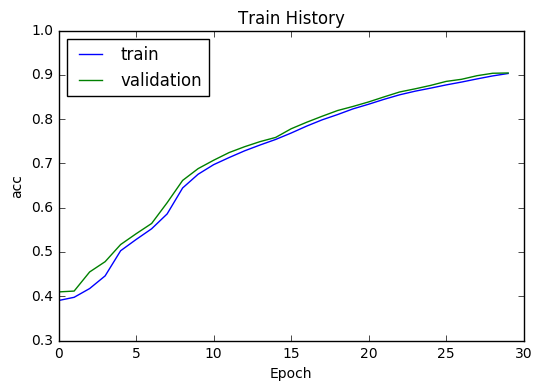

In [21]:
show_train_history(train_history,'acc','val_acc')

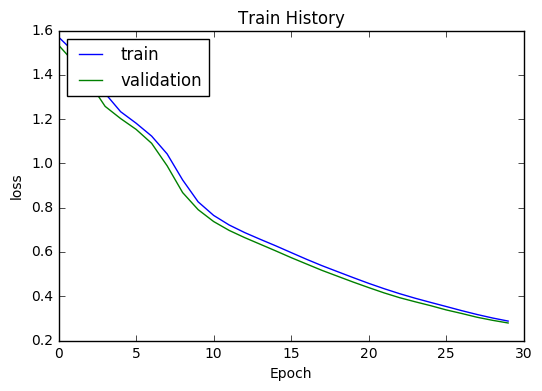

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19702/19702 [==============================] - 5s 241us/step


In [24]:
scores[1]

0.9039691402009146